<a href="https://colab.research.google.com/github/sunlight2018/hands_on_ml3_notebooks/blob/main/notebooks/03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This chapter will do handwriting recognizaiton using MNIST data and label

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

In [3]:
x, y = mnist.data, mnist.target
print(x)
x.shape


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(70000, 784)

In [4]:
print(y, type(y))
y.shape


['5' '0' '4' ... '4' '5' '6'] <class 'numpy.ndarray'>


(70000,)

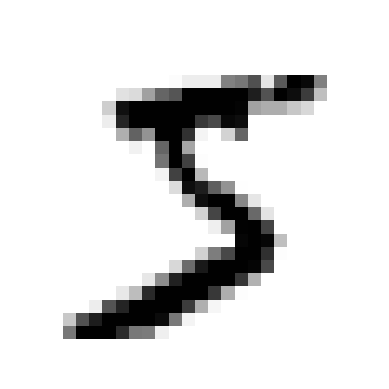

In [5]:
import matplotlib.pyplot as plt

def plot_digital(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')

some_image = x[0]
plot_digital(some_image)
plt.show()

In [6]:
y[0]

'5'

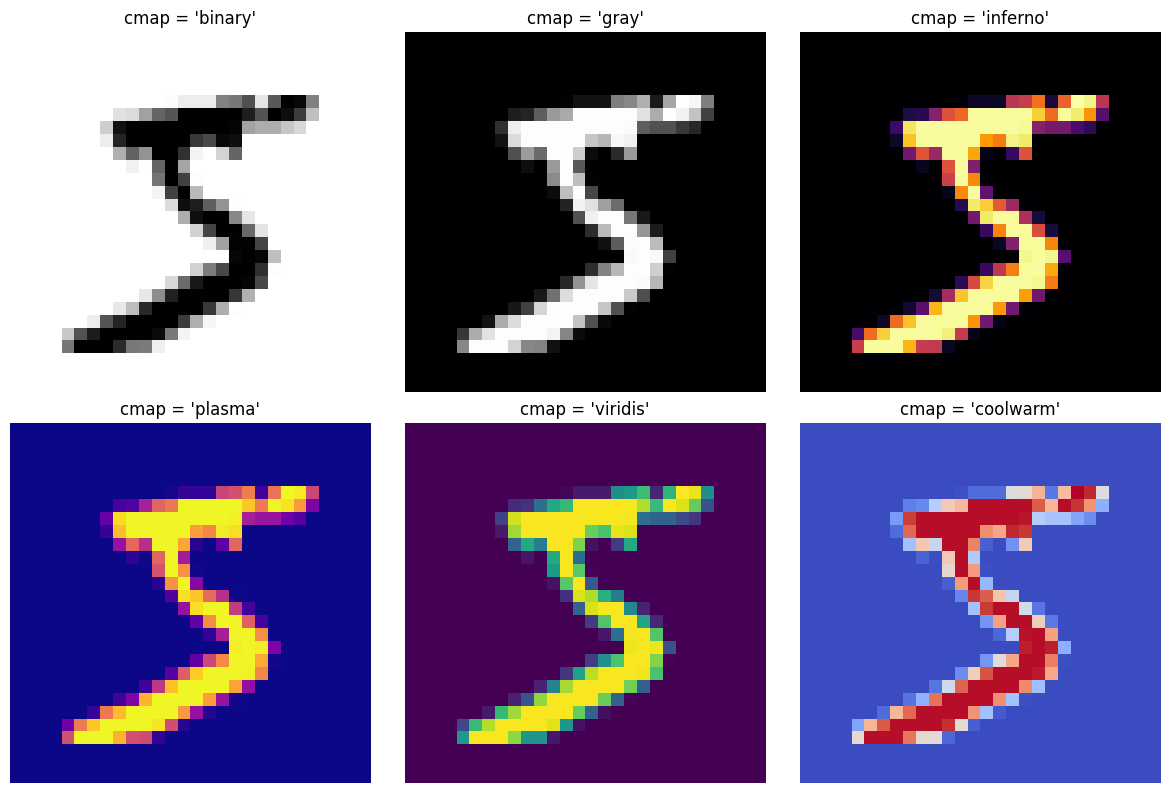

In [7]:
# 🎨 cmap 示例：同一张 MNIST 图像，不同颜色映射的对比

# 选择一张图像（第0张）
some_image = x[0].reshape(28, 28)

# 不同 colormap 示例
cmaps = ["binary", "gray", "inferno", "plasma", "viridis", "coolwarm"]

# 创建子图网格
plt.figure(figsize=(12, 8))

for idx, cmap in enumerate(cmaps):
    plt.subplot(2, 3, idx +1)
    plt.imshow(some_image, cmap=cmap)
    plt.title(f"cmap = '{cmap}'")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [8]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
print(y_train[:16])
print(y_train_5[:16])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7']
[ True False False False False False False False False False False  True
 False False False False]


In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
some_image = x[0]
sgd_clf.predict([some_image])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_clf, x_train, y_train_5, cv= 3, scoring= 'accuracy')

In [13]:
print(score, score.mean())

[0.95035 0.96035 0.9604 ] 0.9570333333333334


In [14]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_clf, x_train, y_train_5, cv= 3, scoring= 'f1')
print(score, score.mean())

[0.63126625 0.74460548 0.79375   ] 0.7232072402875868


In [15]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [16]:
cross_val_score(dummy_clf, x_train, y_train_5, cv= 3, scoring= 'f1')

array([0., 0., 0.])

In [17]:
cross_val_score(dummy_clf, x_train, y_train_5, cv= 3, scoring= 'accuracy')

array([0.90965, 0.90965, 0.90965])

In [18]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 42)
score_skf = cross_val_score(sgd_clf, x_train, y_train_5, cv= skf, scoring='f1')
print(score_skf, score_skf.mean())


[0.79718137 0.66956007 0.80294208] 0.7565611738038069


In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv= 3)


In [20]:
print(y_train_pred)

[ True False False ...  True False False]


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


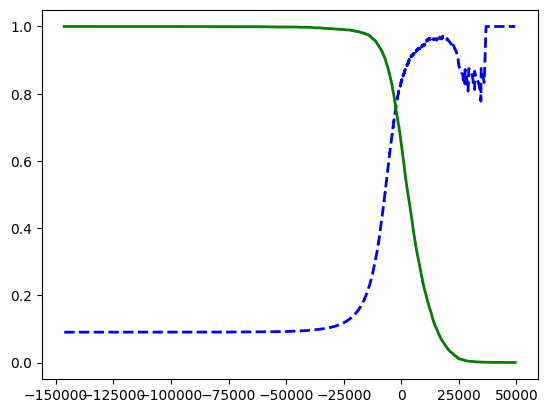

In [22]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.show()

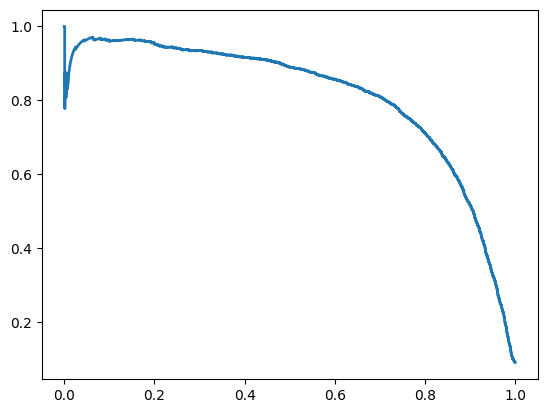

In [23]:
plt.plot(recalls, precisions, linewidth = 2, label = "Precision/ Recall Curve")
plt.show()

In [24]:
idx_for_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(threshold_for_90_precision)

3370.0194991439557


In [25]:
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [26]:
y_train_90= (y_scores >= threshold_for_90_precision)

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probes_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv= 3, method= 'predict_proba')

In [28]:
y_probes_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [29]:
y_probes_forest[:2,1]

array([0.89, 0.01])

In [30]:
y_scores_forest = y_probes_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

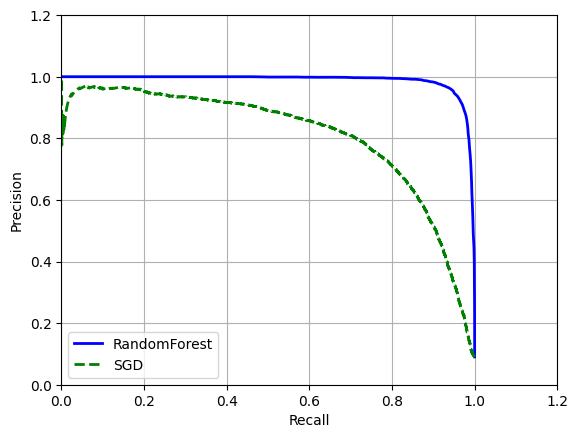

In [31]:
plt.plot(recalls_forest, precisions_forest, 'b-', linewidth = 2, label = 'RandomForest')
plt.plot(recalls, precisions, 'g--', linewidth = 2, label = 'SGD')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1.2,0,1.2])
plt.grid()
plt.legend(loc= 'lower left')
#save_fig('pr_curve_comparison_curve')
plt.show()

In [32]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(x_train[:2000], y_train[:2000])
svm_clf.predict([x_train[2001]])


array(['8'], dtype=object)

In [33]:
print(y_train[2001])

8


In [34]:
some_digit_score = svm_clf.decision_function([some_image])

In [35]:
some_digit_score.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [36]:
class_id = some_digit_score.argmax()
print(class_id)

5


In [37]:
svm_clf.classes_


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [38]:
svm_clf.classes_[class_id]

'5'

In [39]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(x_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [40]:
ovr_clf.predict([some_image])

array(['5'], dtype='<U1')

In [41]:
len(ovr_clf.estimators_)

10

In [42]:
sgd_clf= SGDClassifier(random_state= 42)
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_image])

KeyboardInterrupt: 

In [ ]:
sgd_clf.decision_function([some_image])

看一下预处理先后，得分的变化

In [ ]:
cross_val_score(sgd_clf, x_train, y_train, cv= 3, scoring= 'accuracy')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype('float64'))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv= 3, scoring= 'accuracy')

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred= cross_val_predict(sgd_clf, x_train_scaled, y_train, cv= 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred= cross_val_predict(sgd_clf, x_train_scaled, y_train, cv= 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize= 'true', values_format= '.0%')
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight = sample_weight, normalize= 'true', values_format= '.0%')
plt.show()

In [43]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8')%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [1]:
knn_clf.predict(x[:10])

NameError: name 'knn_clf' is not defined